In [21]:
import networkx as nx
import matplotlib.pyplot as plt
from pyvis import network as net
from matplotlib.pyplot import cm
import matplotlib
import numpy as np



import math

G = nx.DiGraph()

subfactories = [
    ('utility-science-pack', 1000,
     [('processing-unit', 476.2), ('flying-robot-frame', 238.1), ('low-density-structure', 714.3)]),
    ('production-science-pack', 1000,
      [('rail', 7143), ('electric-furnace', 238.1), ('productivity-module', 238.1)]),
    ('chemical-science-pack', 1000,
      [('sulfur', 357.1), ('advanced-circuit', 1071), ('engine-unit', 714.3)]),
    ('military-science-pack', 1000,
     [('piercing-rounds-magazine', 357.1), ('grenade', 357), ('stone-brick', 3571)]),
    ('logistic-science-pack', 1000,
     [('iron-plate', 2602), ('electronic-circuit', 714.3)]), 
    ('automation-science-pack', 1000,
     [('copper-plate', 714), ('iron-plate', 1020)]),
    ('space-science-pack', 1000,
     [('rocket-control-unit', 714.3), ('low-density-structure', 714.3), ('rocket-fuel', 714.3), ('sattelite', 1)]),
    
    ('sattelite', 1,
     [('processing-unit', 100), ('low-density-structure', 100), ('rocket-fuel', 50), ('copper-plate', 500), ('steel-plate', 500 ), ('electronic-circuit', 1525), ('iron-plate', 300), ('battery', 500)]),
    ('low-density-structure', 1529,
     [('copper-plate', 21836), ('steel-plate', 2184), ('plastic-bar', 5459)]),
    ('rocket-control-unit', 714.3,
     [('electronic-circuit', 2551), ('advanced-circuit', 2551), ('processing-unit', 510)]),
    ('processing-unit', 1086,
     [('electronic-circuit', 15519), ('advanced-circuit', 1552), ('sulfuric-acid', 3880)]),
    ('grenade', 357,
     [('coal', 3571), ('iron-plate', 1786)]),
    ('sulfur', 357,
     [('water', 4121), ('petroleum-gas', 4121)]),
    ('piercing-rounds-magazine', 357,
     [('copper-plate', 1786), ('steel-plate', 357), ('iron-plate', 1429)]),
    ('rail', 7143,
     [('stone', 3571), ('steel-plate', 3571), ('iron-plate', 1276)]),
    ('electric-furnace', 238,
     [('steel-plate', 2381), ('advanced-circuit', 1190), ('stone-brick', 2381)]),
    ('productivity-module', 238,
     [('electronic-circuit', 1190), ('advanced-circuit', 1190)]),
    ('flying-robot-frame', 238,
     [('steel-plate', 170.1), ('battery', 340.1), ('electronic-circuit', 510.2), ('electric-engine-unit', 170.1)]),
    ('advanced-circuit', 7555,
     [('plastic-bar', 10793), ('electronic-circuit', 10793), ('copper-plate', 7710)]),
    ('electric-engine-unit', 170.1,
     [('electronic-circuit', 243), ('engine-unit', 121.5), ('lubricant', 1822)]),
    ('engine-unit', 121.5,
     [('steel-plate', 597), ('iron-plate', 2047)]),
    ('electronic-circuit', 33047,
     [('iron-plate', 23605), ('copper-plate', 25291)]),
    ('stone-brick', 5952,
     [('stone', 9921)]),
    ('battery', 840.1,
     [('iron-plate', 646.3), ('copper-plate', 646.3), ('sulfuric-acid', 12925)]),
    ('plastic-bar', 16252,
     [('coal', 6251), ('petroleum-gas', 125020)]),
    ('sulfuric-acid', 16805,
     [('iron-plate', 258.5), ('sulfur', 1293), ('water', 25854)]),
    ('copper-plate', 58483,
     [('copper-ore', 48736)]),
    ('iron-plate', 34969,
     [('iron-ore', 29140)]),
    ('rocket-fuel', 764.3,
      [('light-oil', 47452)]),
    ('lubricant', 1822,
     [('heavy-oil', 1402)]),
    ('oil-processing', 1,
     [('water', 57279 + 54497 + 26872), ('crude-oil', 11458)]),
    ('heavy-oil', 1402,
     [('oil-processing', 10)]),
    ('light-oil', 47452 + 45934 - 54497,
     [('oil-processing', 10)]),
    ('petroleum-gas', 81909 + 47231,
     [('oil-processing', 10)]),
    ('steel-plate', 9760,
     [('iron-ore', 33889)]),
]


for subfactory in subfactories:
    (material, output, inputs) = subfactory
    G.add_node(material, value=output)
    G.add_edges_from([(
        input_material,
        material,
        {'width': input_value, 'arrows': 'to'}
    ) for (input_material, input_value) in inputs])

pos = nx.spring_layout(G)


In [22]:
outputs = nx.get_node_attributes(G, 'value')
node_size = [100 * math.log(max(10, outputs.get(key, 10))) for key in G.nodes()]

edge_widths = [w for (*edge, w) in G.edges.data('width')]

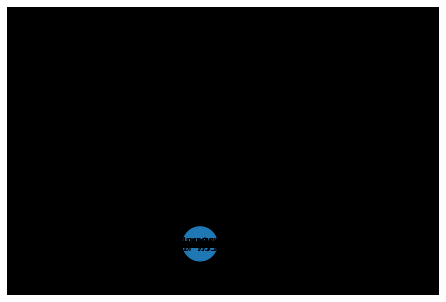

In [23]:
nx.draw(
    G,
    pos,
    width=edge_widths,
    with_labels=True,
    node_size=node_size
)

plt.show()

In [24]:
g = net.Network('1000px', '800px', notebook=True)

g.from_nx(G)
g.show_buttons(filter_=['physics'])
g.toggle_physics(False)
g.show("factorio.html")

In [25]:
import plotly.graph_objects as go

def mpc_to_rgba(value, alpha=1):
    return 'rgba({},{},{},{})'.format(*[int(f * 255) for f in matplotlib.colors.to_rgb(value)], alpha)

c = iter(cm.rainbow(np.linspace(0, 1, G.order())))

node_label = [str(n) for n in G]
node_color = [next(c) for n in G]

(source, target, value, edge_color, edge_label) = zip(*[
        [*[node_label.index(n) for n in edge],
         w,
         'rgba(127,127,127,0.4)',
         '{}->{}'.format(*edge)
        ] for (*edge, w) in G.edges.data('width')
    ])

fig = go.Figure(data=[go.Sankey(
    valueformat = ".0f",
    valuesuffix = "TWh",
    # Define nodes
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =  node_label,
      color =  [mpc_to_rgba(color, 0.7) for color in node_color]
    ),
    # Add links
    link = dict(
      source =  source,
      target =  target,
      value =  value,
      label =  edge_label,
      line = dict(color = "black", width = 0.2),
      color =  edge_color
))])

fig.update_layout(title_text="Megabase production", font_size=10)
fig.show()

In [26]:
import plotly.graph_objects as go
import urllib, json


url = 'https://gist.githubusercontent.com/lilred/503c8c261715968090a11acaf7c02507/raw/3ffe06720d0ed5b0008dde694b2b9028cf5349fa/factorio-0.17-item-stack-sizes.json'
response = urllib.request.urlopen(url)
stack_sizes = json.loads(response.read())
stack_sizes['sattelite'] = { 'stack_size': 1, 'name': 'sattelite' }

def items_to_trains(material, item_count):
    stack_size = stack_sizes.get(material, { 'stack_size': 625 })['stack_size']
    trains = item_count / stack_size / 40
    return trains

def edge_values_as_trains(node_labels, source, values):
    return [items_to_trains(node_labels[source[i]], v) for i, v in enumerate(values)]

def mpc_to_rgba(value, alpha=1):
    return 'rgba({},{},{},{})'.format(*[int(f * 255) for f in matplotlib.colors.to_rgb(value)], alpha)

c = iter(cm.tab20(np.linspace(0, 1, G.order())))
science_linspace = np.linspace(0, 1, 7)

node_label = [str(n) for n in G]
node_color = [next(c) for n in G]

(source, target, value, edge_color, edge_label) = zip(*[
        [*[node_label.index(n) for n in edge],
         w,
         node_color[node_label.index(edge[0])],
         '{}->{}'.format(*edge)
        ] for (*edge, w) in G.edges.data('width')
    ])

fig = go.Figure(data=[go.Sankey(
    valueformat = ".1f",
    valuesuffix = " wagons/min",
    # Define nodes
    node = dict(
      pad = 30,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =  node_label,
      color =  [mpc_to_rgba(color, 0.7) for color in node_color]
    ),
    # Add links
    link = dict(
      source =  source,
      target =  target,
      value =  edge_values_as_trains(node_label, source, value),
      label =  edge_label,
      line = dict(color = "black", width = 0.2),
      color =  [mpc_to_rgba(color, 0.3) for color in edge_color]
))])

fig.update_layout(title_text="Megabase production wagons / min", font_size=12, height=800)
fig.show()